# mount google drive

In [1]:
# Mount Drive
import os
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir("./drive/My Drive/RouteRunners")

In [3]:
os.getcwd()

'/content/drive/My Drive/RouteRunners'

# Importing the Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
distances = pd.read_csv("Large-Scale-Route-Optimization/distance.csv")

In [6]:
distances.head()

,Source,Destination,Distance(M)
0,City_24,City_47,1114251
1,City_24,City_31,97187
2,City_24,City_54,1716028
3,City_24,City_53,1729925
4,City_24,City_19,1594107


In [7]:
len(distances)

3782

# Checking if distances are the same both ways
find all in destination with city_24 and city_47

In [8]:
distances[((distances['Destination'] == 'City_24') & (distances['Source'] == 'City_47')) | (distances['Source'] == 'City_24') & (distances['Destination'] == 'City_47')]

,Source,Destination,Distance(M)
0,City_24,City_47,1114251
61,City_47,City_24,1116847


The distances are not the same going both ways

# Checking if all cities are connected to one another

In [9]:
grouped = distances.groupby('Source')['Destination'].count()

Text(0.5, 1.0, 'Number of Destinations by Source')

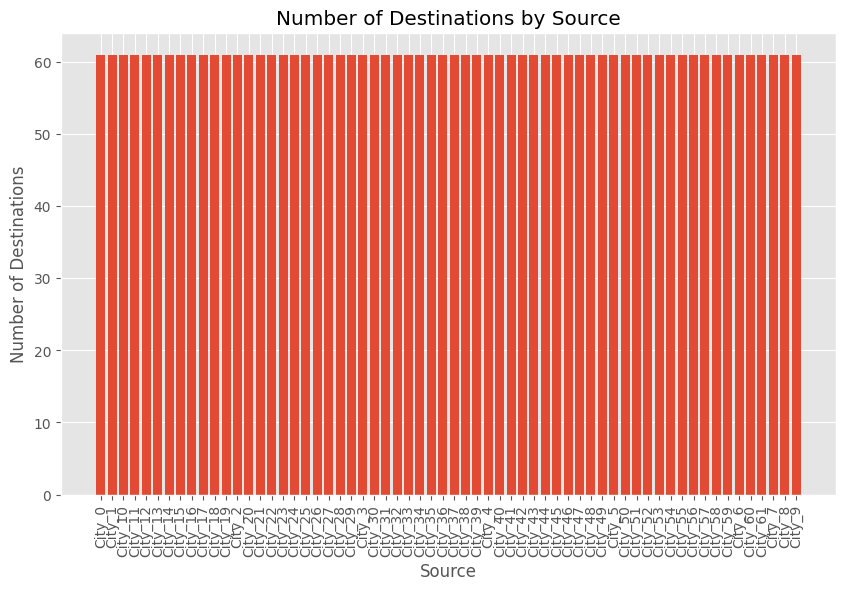

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(grouped.index, grouped.values)
plt.xlabel('Source')
plt.xticks(rotation=90)
plt.ylabel('Number of Destinations')
plt.title('Number of Destinations by Source')

How many destinations are there for City_0

In [11]:
dest = distances[distances['Source'] == 'City_0']['Destination'].count()
print(dest)

61


the number of cities

In [12]:
print(grouped.count())

62


All cities are connected to every other city

# Visualizing city isolation

plotting sum of distances grouped by city Source

In [13]:
grouped = distances.groupby('Source')['Distance(M)'].sum()

In [14]:
grouped = grouped.sort_values()

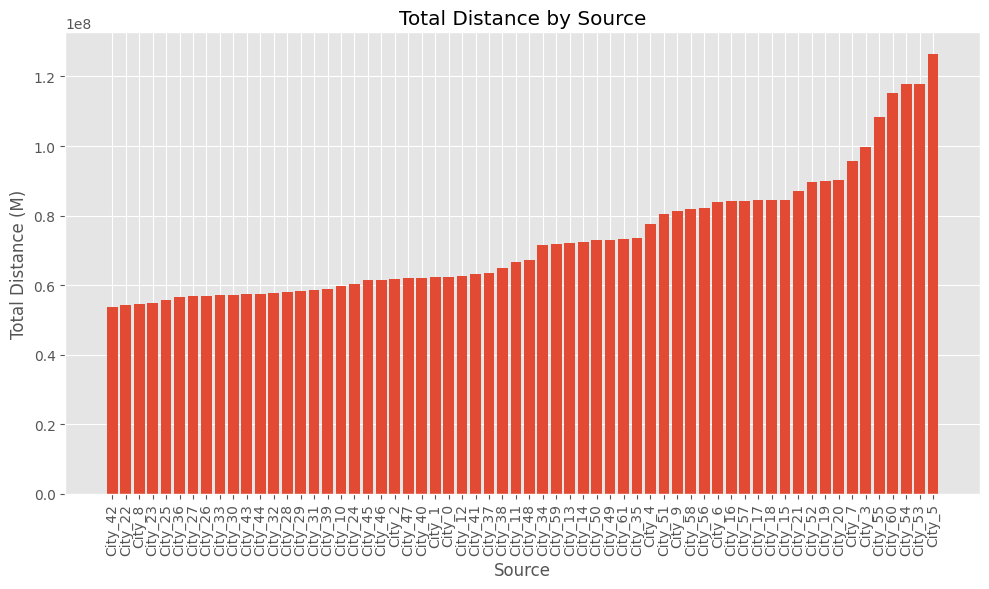

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(grouped.index, grouped.values)
plt.xlabel('Source')
plt.ylabel('Total Distance (M)')
plt.title('Total Distance by Source')
plt.xticks(rotation=90)
plt.tight_layout()

In [16]:
grouped = distances.groupby('Destination')['Distance(M)'].sum()

In [17]:
grouped = grouped.sort_values()

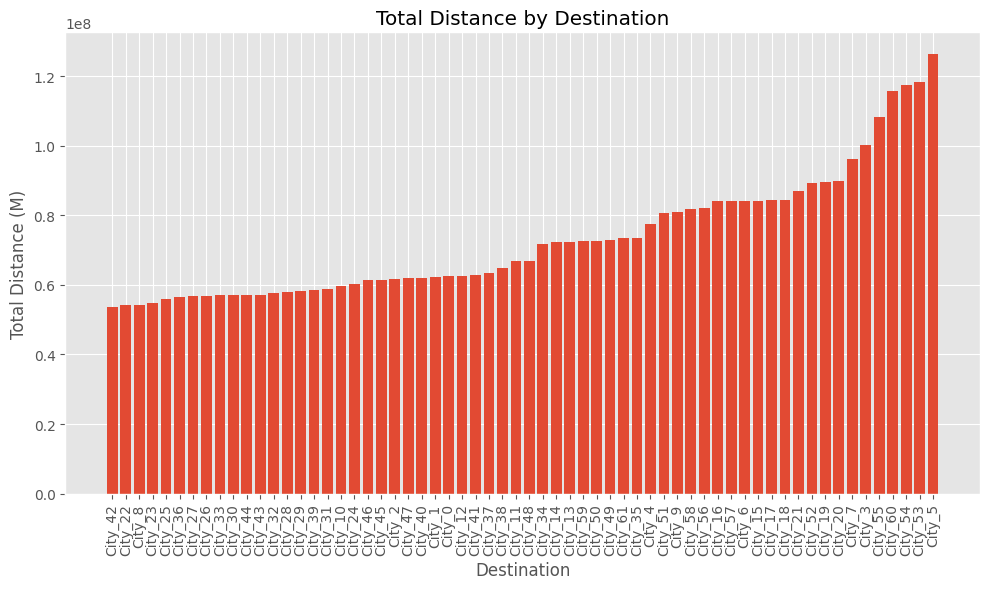

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.bar(grouped.index, grouped.values)
plt.xlabel('Destination')
plt.ylabel('Total Distance (M)')
plt.title('Total Distance by Destination')
plt.xticks(rotation=90)
plt.tight_layout()

some cities are much more isolated than other cities

    City 5 is the most isolated
    City 42 is the closest to the center

## How many edges total are in the data?

In [19]:
len(distances)

3782